In [9]:
% matplotlib inline
import numpy as np
import pickle
import numpy.random as npr
import matplotlib.pyplot as plt

from SwingyMonkey import *

## Loading and playing with randomized data from 100 epochs

In [2]:
with open("hist",'r') as f:
    hist_dict = pickle.load(f)

In [7]:
random_hist = np.load('random_hist.npy')

In [5]:
print hist_dict['score_history']

[0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1]


In [8]:
print random_hist

[0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


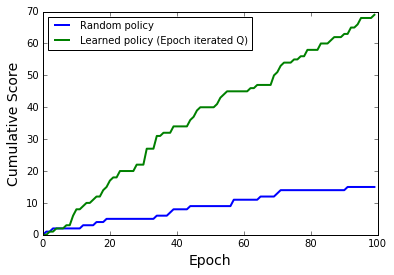

In [10]:
plt.figure()
plt.plot(np.cumsum(random_hist),lw=2,label='Random policy')
plt.plot(np.cumsum(hist_dict['score_history']),lw=2,label='Learned policy (Epoch iterated Q)')
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('Cumulative Score',fontsize=14)
plt.legend(loc=0,fontsize=10)
plt.show()

In [4]:
print len(hist_dict['reward'][16])
print len(hist_dict['action'][16])
print len(hist_dict['state'][16])

88
88
88


In [6]:
len(hist_dict['reward'])

100

In [10]:
final_reward = []
min_length = 100
for ii in range(len(hist_dict['reward'])):
    final_reward.append(hist_dict['reward'][ii][-1])
    if len(hist_dict['reward'][ii]) < min_length:
        min_length = len(hist_dict['reward'][ii])
print "Shortest epoch: {} iterations".format(min_length)

Shortest epoch: 11 iterations


In [11]:
print final_reward

[-5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -10.0, -10.0, -10.0, -5.0, -5.0, -10.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -10.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -10.0, -5.0, -10.0, -5.0, -10.0, -5.0, -5.0, -10.0, -10.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -10.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0]


In [15]:
print np.cumsum(hist_dict['reward'][16])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3. -2.]


## Figure out gravity (for consecutive actions==False, see how velocity changes, only need to do this once per epoch)

In [5]:
hist_dict['action'][0][:2]

[False, False]

In [7]:
hist_dict['state'][0][0]

{'monkey': {'bot': 200, 'top': 256, 'vel': 0},
 'score': 0,
 'tree': {'bot': 17, 'dist': 485, 'top': 217}}

In [11]:
hist_dict['state'][16][0].values()

[0, {'bot': 60, 'dist': 485, 'top': 260}, {'bot': 200, 'top': 256, 'vel': 0}]

## Append actions to states (figure out how to represent the states in tuple form--do we keep everything+gravity+action?)

## Train Extratrees on augmented state tuples

## Build policy based on inferring two actions against estimator
#### First, infer gravity and append it to any observed state
#### Then, apply Bellman equation